In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [33]:
df =pd.read_excel('2019 Radian Case Interview Data.xlsx')

In [34]:
#changing the column names for smoother programming
columns=['storenumber', 'division', 'marketarea', 'subregion','totalstoresales', 'totalstoresfootage','totalstoresellingsqft', 'annualbakerysales',
       'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft',
       'bakerydeptsizegroup',
       'coffeshoptype_nb',
       'storetype_a', 'storetype_b',
       'a_dd', 'b_gl', 'c_qf',
       'd_t', 'e-us', 'f_b']

df.columns=columns

In [40]:
#checking for null values
df.isnull().sum()

storenumber                             0
division                                0
marketarea                              0
subregion                               0
totalstoresales                         0
totalstoresfootage                      0
totalstoresellingsqft                   0
annualbakerysales                       0
avgweeklybakerysales                    0
annualbakerygrossmargin                 0
bakerygrossmarginrate                   0
annualbakerynetoperatingearnings        0
bakerynetoperatingearningspercentage    0
annualbakerydirectpayrollcosts          0
bakerydirectpayrollpercentage           0
annualbakerydeptlaberhours              0
bakerysellingsqft                       0
bakerydeptsizegroup                     0
coffeshoptype_nb                        0
storetype_a                             0
storetype_b                             0
a_dd                                    0
b_gl                                    0
c_qf                              

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 27 columns):
storenumber                             515 non-null int64
division                                515 non-null object
marketarea                              515 non-null object
subregion                               515 non-null int64
totalstoresales                         515 non-null float64
totalstoresfootage                      515 non-null int64
totalstoresellingsqft                   515 non-null int64
annualbakerysales                       515 non-null float64
avgweeklybakerysales                    515 non-null float64
annualbakerygrossmargin                 515 non-null float64
bakerygrossmarginrate                   515 non-null float64
annualbakerynetoperatingearnings        515 non-null float64
bakerynetoperatingearningspercentage    515 non-null float64
annualbakerydirectpayrollcosts          515 non-null float64
bakerydirectpayrollpercentage           515 non-nul

In [41]:
df.head()

,storenumber,division,marketarea,subregion,totalstoresales,totalstoresfootage,totalstoresellingsqft,annualbakerysales,avgweeklybakerysales,annualbakerygrossmargin,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,REGION 1,1,25051671.12,37440,21824,537176.06,10330.308846,314725.23,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,REGION 1,1,37256804.00,79436,48453,851926.89,16383.209423,489247.63,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,REGION 1,1,21649459.79,78133,48220,599781.15,11534.252885,327419.16,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,REGION 1,1,37771075.80,75391,45118,858674.28,16512.966923,499531.40,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,REGION 1,1,39641511.90,80125,48105,834844.29,16054.697885,479350.66,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [71]:
#total store
totstore= ['storenumber', 'division', 'marketarea', 'subregion','totalstoresales', 'totalstoresfootage','totalstoresellingsqft']

#annual bakery 
bd=['annualbakerysales',
       'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft']

#store attr
storeatt=['bakerydeptsizegroup','coffeshoptype_nb']

#storesegm
storesegmcustprof=['storetype_a', 'storetype_b','a_dd', 'b_gl', 'c_qf','d_t', 'e-us', 'f_b']

In [176]:
df.head()

,storenumber,division,marketarea,subregion,totalstoresales,totalstoresfootage,totalstoresellingsqft,annualbakerysales,avgweeklybakerysales,annualbakerygrossmargin,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,REGION 1,1,25051671.12,37440,21824,537176.06,10330.308846,314725.23,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,REGION 1,1,37256804.00,79436,48453,851926.89,16383.209423,489247.63,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,REGION 1,1,21649459.79,78133,48220,599781.15,11534.252885,327419.16,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,REGION 1,1,37771075.80,75391,45118,858674.28,16512.966923,499531.40,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,REGION 1,1,39641511.90,80125,48105,834844.29,16054.697885,479350.66,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [196]:
# questions
'''How big is our bakery business today? What is the sales contribution to the total store?  '''


bakerybusiness=df['annualbakerysales'].sum()
print('$'+str(round(bakerybusiness/1000000000,2))+' billion')

totalstore=df['totalstoresales'].sum()
print('$'+str(round(totalstore/1000000000,2))+' billion')

print('The total bakery business is about ',round((bakerybusiness/totalstore) *100,2),"% of total store")

$0.33 billion
$15.6 billion
The total bakery business is about  2.13 % of total store


In [212]:
'''Average sales per store and range of variability?'''

avgsalesperstore = df['totalstoresales'].mean()
avgbaksalesperstore=df['annualbakerysales'].mean()
print('$'+str(round(avgsalesperstore/1000000,2))+' million')

print('$'+str(round(avgbaksalesperstore/1000000,2))+' million')

print('The total bakery business is about ',round((avgbaksalesperstore/avgsalesperstore) *100,2),"% of total store")




$30.29 million
$0.65 million
The total bakery business is about  2.13 % of total store


In [213]:
def normalize(df,columns):
    for each in columns:
        df[each]=df[each]-(df[each].mean())/df[each].std()
    return df

In [ ]:
'''Does size matter? 
What impact does store square footage and store sales volume have on bakery department sales? 
What impact does bakery square footage have on bakery department sales?  Are larger bakeries better?
'''

In [237]:


#sales analysis
sales=df[['division','marketarea','subregion','totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','avgweeklybakerysales','annualbakerygrossmargin','bakerysellingsqft']]
intcolumns=['totalstoresales','totalstoresfootage','totalstoresellingsqft','annualbakerysales','avgweeklybakerysales','annualbakerygrossmargin','bakerysellingsqft']


sales[intcolumns] = sales[intcolumns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [238]:
sales.head()

,division,marketarea,subregion,totalstoresales,totalstoresfootage,totalstoresellingsqft,annualbakerysales,avgweeklybakerysales,annualbakerygrossmargin,bakerysellingsqft
0,DIVISION 01,REGION 1,1,0.264983,0.205858,0.201056,0.249785,0.249785,0.264204,0.194949
1,DIVISION 01,REGION 1,1,0.460841,0.669656,0.794487,0.447540,0.447540,0.453361,0.339391
2,DIVISION 01,REGION 1,1,0.210387,0.655266,0.789294,0.289119,0.289119,0.277962,0.418220
3,DIVISION 01,REGION 1,1,0.469094,0.624983,0.720166,0.451779,0.451779,0.464507,0.243805
4,DIVISION 01,REGION 1,1,0.499109,0.677265,0.786731,0.436807,0.436807,0.442634,0.322398


In [239]:
# the totalstoresales are  correlated with totalstorefootage (more storefootage, more sales)
# but we can see in the division 01 and subregion 1 the sales is drastically low : let's keep this in mind and move forward
sales.groupby(['division','subregion']).agg({'totalstoresales':sum,'totalstoresfootage':sum}).\
sort_values(['totalstoresfootage'],ascending=False).iplot(kind='bar')

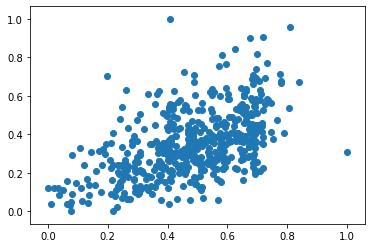

In [240]:
plt.scatter(sales['totalstoresfootage'],sales['totalstoresales'])

In [241]:
# but here you can see the totalstoresales of bakery is driven by how much the over all sales in the store is making 
# so the totalsore and totalsquarefotage have some high corelated
sales.groupby(['division','subregion']).agg({'totalstoresales':sum,'annualbakerysales':sum}).\
sort_values(['totalstoresales'],ascending=False).iplot(kind='bar')

Text(0.5, 0, 'totalstoresales')

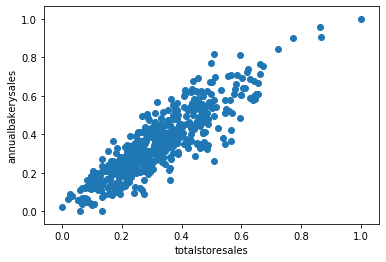

In [259]:
plt.scatter(sales['annualbakerysales'],sales['totalstoresales'])
plt.ylabel('annualbakerysales')
plt.xlabel('totalstoresales')

In [243]:
#based on this we can see the more the total suare footage more the total sales which is more the annualbakery sales

sales.groupby(['division','subregion']).agg({'totalstoresales':sum,'totalstoresfootage':sum,'annualbakerysales':sum}).\
sort_values(['totalstoresfootage','totalstoresales'],ascending=False).iplot(kind='bar')

In [245]:
# What impact does bakery square footage have on bakery department sales?  Are larger bakeries better?



sales.groupby(['division','subregion']).agg({'annualbakerysales':sum,'bakerysellingsqft':sum}).\
sort_values(['annualbakerysales'],ascending=False).iplot(kind='bar')

Text(0.5, 0, 'bakerysellingsqft')

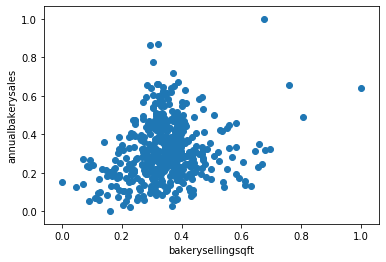

In [256]:
# according to the data trend it can be seen that, smaller and mediocre size bakeries make good amount of sales as compared to larger ones 
plt.scatter(sales['bakerysellingsqft'],sales['annualbakerysales'])
plt.ylabel('annualbakerysales')
plt.xlabel('bakerysellingsqft')

In [ ]:
# what drives the bakery department sales?
#more the total store sales, more the bakery departmental sales 
# more the totalsizeof the store more the bakery departmental sales 
#medium size bakeries make good amount of sales rather then larger ones

In [261]:
##second section

'''Profitability Analysis'''

#What factors impact bakery department “contribution margin”?  

'''Gross margin is defined as Sales less Materials (pre-calculated in the data set).
Contribution margin is calculated as Gross Margin Less Labor Costs.  
Net Operating Earnings (also pre-calculated in the data set) is Gross Margin, less Labor Costs, less “Allocations.”
'''

'Profitability Analysis'

In [560]:
tempbak=df[['storenumber', 'division', 'marketarea', 'subregion','annualbakerysales', 'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft']]

tempbak['MC']=tempbak['annualbakerysales']-tempbak['annualbakerygrossmargin']
tempbak['MC+LC']=tempbak['MC']+tempbak['annualbakerydirectpayrollcosts']


tempbak['AC']=tempbak['annualbakerygrossmargin']-tempbak['annualbakerydirectpayrollcosts']\
-tempbak['annualbakerynetoperatingearnings']

tempbak['CM']=tempbak['annualbakerygrossmargin']-tempbak['annualbakerydirectpayrollcosts']

tempbak['totspent']=tempbak['MC+LC']+tempbak['AC']

#tempbak['CMRate']=tempbak['CM']/tempbak['annualbakerysales']
#tempbak['ACRate']=tempbak['AC']/tempbak['annualbakerysales']

In [561]:
procolumns=['annualbakerynetoperatingearnings','annualbakerysales', 'MC','annualbakerydirectpayrollcosts',\
            'AC','annualbakerygrossmargin','CM', 'bakerysellingsqft']
tempbak[procolumns].head()

,annualbakerynetoperatingearnings,annualbakerysales,MC,annualbakerydirectpayrollcosts,AC,annualbakerygrossmargin,CM,bakerysellingsqft
0,2587.35,537176.06,222450.83,123972.63,188165.25,314725.23,190752.60,922
1,42395.99,851926.89,362679.26,152187.69,294663.95,489247.63,337059.94,1534
2,14227.37,599781.15,272361.99,130792.52,182399.27,327419.16,196626.64,1868
3,13540.22,858674.28,359142.88,181150.01,304841.17,499531.40,318381.39,1129
4,49579.57,834844.29,355493.63,182483.90,247287.19,479350.66,296866.76,1462


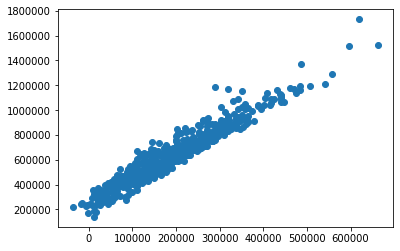

In [562]:
# what factors imapact the bakery department contribution margin
'''CM= Annualbakerysales- (materical cost+labour cost)
AM is dependent on overall bakery sales. So more the Bakery sales, more the contribution margin.'''
plt.scatter(tempbak['CM'],tempbak['annualbakerysales'])


In [622]:

#scaling the features
#tempbak[procolumns]=tempbak[procolumns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
tempbak.groupby(['division']).agg({'CM':sum}).reset_index()

,division,CM
0,DIVISION 01,79926463.54
1,DIVISION 02,20205840.86


In [564]:
tempbak.groupby(['division']).agg({'CM':sum}).reset_index().iplot(kind='pie',labels='division',values='CM')

In [565]:
tempbak.groupby(['division']).agg({'annualbakerysales':sum}).reset_index().iplot(kind='pie',labels='division',values='annualbakerysales')

In [566]:
tempbak.groupby(['division']).agg({'MC+LC':sum}).reset_index().iplot(kind='pie',labels='division',values='MC+LC')

In [567]:
#breakevensalarysales level 
#breakevensales = sales-Netoperatingearnings [ At this point the profit will be neither pos nor neg which is zero]
tempbak['breakeven']=tempbak['annualbakerysales']-tempbak['annualbakerynetoperatingearnings']

In [568]:
# stores which make profit on Allocations being mean of all divisions
sum(tempbak['breakeven']>tempbak['MC']+tempbak['annualbakerydirectpayrollcosts']+tempbak['AC'].mean())

260

In [569]:
tempbak['profitablestore']=tempbak['annualbakerynetoperatingearnings']>0

In [570]:
# third section
#How do sales and profitability compare between the two divisions?  What are the relevant average per store comparisons?
#tempbak.groupby(['division']).agg({'annualbakerynetoperatingearnings':sum}).reset_index().iplot(kind='pie',labels='division',values='annualbakerynetoperatingearnings')

In [571]:
profanal=tempbak.groupby(['division']).agg({'profitablestore':sum,'storenumber':'count'})

In [572]:
profanal

,profitablestore,storenumber
division,,
DIVISION 01,129.0,348
DIVISION 02,3.0,167


In [573]:
# division1 analysis
mask=tempbak['profitablestore']
div1prof=tempbak[tempbak['division']=='DIVISION 01'][mask].mean().reset_index()
div1nonprof=tempbak[tempbak['division']=='DIVISION 01'][~mask].mean().reset_index()

In [574]:
#underlying causes becuase the Net operating earnings are more 

#What roles do Materials, Labor and Allocations (all other store costs) have on Operating Earnings?  Why?
#OE= Revenue- (MC+LC+AC)
#the less the Material cost, labor cost and Allocations the more the earnings

In [575]:
div1=pd.merge(div1prof,div1nonprof,left_on='index',right_on='index',suffixes=('_prof','_nonprof'),how='inner')
div1

,index,0_prof,0_nonprof
0,storenumber,479.263566,530.118721
1,subregion,2.108527,2.525114
2,annualbakerysales,870713.924419,585690.006393
3,avgweeklybakerysales,16778.300080,11265.139271
4,annualbakerygrossmargin,499003.279612,321934.833836
5,bakerygrossmarginrate,0.570997,0.545100
6,annualbakerynetoperatingearnings,59221.683333,-68712.681187
7,bakerynetoperatingearningspercentage,0.061174,-0.142462
8,annualbakerydirectpayrollcosts,176984.052481,146656.371553
9,bakerydirectpayrollpercentage,0.206349,0.259372


In [576]:
#additional data analysis

In [577]:
# customer segmentation
storeatt=['bakerydeptsizegroup','coffeshoptype_nb']

#storesegm
storesegmcustprof=['storetype_a', 'storetype_b','a_dd', 'b_gl', 'c_qf','d_t', 'e-us', 'f_b']

newstoresegm=df[['storenumber']+storeatt+storesegmcustprof]

In [578]:
conseg= pd.merge(tempbak,newstoresegm,left_on='storenumber',right_on='storenumber',how='inner')

In [579]:
# number of stores in coffeshot typ
conseg.head()

,storenumber,division,marketarea,subregion,annualbakerysales,avgweeklybakerysales,annualbakerygrossmargin,bakerygrossmarginrate,annualbakerynetoperatingearnings,bakerynetoperatingearningspercentage,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,REGION 1,1,537176.06,10330.308846,314725.23,0.585888,2587.35,0.004817,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,REGION 1,1,851926.89,16383.209423,489247.63,0.574284,42395.99,0.049765,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,REGION 1,1,599781.15,11534.252885,327419.16,0.545898,14227.37,0.023721,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,REGION 1,1,858674.28,16512.966923,499531.40,0.581747,13540.22,0.015769,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,REGION 1,1,834844.29,16054.697885,479350.66,0.574180,49579.57,0.059388,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [580]:
# dunkin donuts is helping the bakery business to drive profits
conseg.groupby(['coffeshoptype_nb','division']).agg({'storenumber':'count','profitablestore':sum}).\
sort_values(['profitablestore'],ascending=False).iplot(kind='bar')

In [581]:
conseg.groupby(['bakerydeptsizegroup','division']).agg({'storenumber':'count','profitablestore':sum}).\
sort_values(['profitablestore'],ascending=False).reset_index().iplot(kind='pie',labels=['bakerydeptsizegroup','division'],values='profitablestore',pull=0.2)

In [582]:
conseg.columns

Index(['storenumber', 'division', 'marketarea', 'subregion',
       'annualbakerysales', 'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft', 'MC', 'MC+LC', 'AC',
       'CM', 'totspent', 'breakeven', 'profitablestore', 'bakerydeptsizegroup',
       'coffeshoptype_nb', 'storetype_a', 'storetype_b', 'a_dd', 'b_gl',
       'c_qf', 'd_t', 'e-us', 'f_b'],
      dtype='object')

In [583]:
#consumer segments

'''We have two store clustering structures (scheme A and B).   How do the store clusters align with performance?  
Which store cluster scheme would you recommend to use for the Bakery Strategy or are there other store consumer segmentation alternatives that we should consider?
'''

'We have two store clustering structures (scheme A and B). \xa0 How do the store clusters align with performance? \xa0\nWhich store cluster scheme would you recommend to use for the Bakery Strategy or are there other store consumer segmentation alternatives that we should consider?\n'

In [584]:
conseg.head()

,storenumber,division,marketarea,subregion,annualbakerysales,avgweeklybakerysales,annualbakerygrossmargin,bakerygrossmarginrate,annualbakerynetoperatingearnings,bakerynetoperatingearningspercentage,...,bakerydeptsizegroup,coffeshoptype_nb,storetype_a,storetype_b,a_dd,b_gl,c_qf,d_t,e-us,f_b
0,1,DIVISION 01,REGION 1,1,537176.06,10330.308846,314725.23,0.585888,2587.35,0.004817,...,SMALL,None,1-Quality Places,2-Mid/Traditional,0.230706,0.090784,0.046249,0.306602,0.268462,0.057197
1,3,DIVISION 01,REGION 1,1,851926.89,16383.209423,489247.63,0.574284,42395.99,0.049765,...,MEDIUM,Dunkin Donuts,2-Mainstream Markets,2-Mid/Traditional,0.184601,0.141916,0.075622,0.301760,0.210752,0.085349
2,5,DIVISION 01,REGION 1,1,599781.15,11534.252885,327419.16,0.545898,14227.37,0.023721,...,LARGE,None,3-Savings Centers,2-Mid/Traditional,0.146546,0.085418,0.045554,0.367253,0.264162,0.091067
3,6,DIVISION 01,REGION 1,1,858674.28,16512.966923,499531.40,0.581747,13540.22,0.015769,...,SMALL,Starbucks,1-Quality Places,2-Mid/Traditional,0.201927,0.140318,0.072568,0.302012,0.204857,0.078319
4,7,DIVISION 01,REGION 1,1,834844.29,16054.697885,479350.66,0.574180,49579.57,0.059388,...,MEDIUM,Dunkin Donuts,1-Quality Places,2-Mid/Traditional,0.129740,0.143704,0.096409,0.305724,0.194539,0.129884


In [544]:
conseg.groupby(['storetype_a']).agg({'profitablestore':sum}).sort_values(['profitablestore'],ascending=False).iplot(kind='bar')

In [587]:
conseg.groupby(['storetype_a']).agg({'totspent':sum,'annualbakerynetoperatingearnings':sum,'annualbakerysales':sum}).sort_values(['totspent'],ascending=False).iplot(kind='bar')

In [585]:
conseg.columns

Index(['storenumber', 'division', 'marketarea', 'subregion',
       'annualbakerysales', 'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft', 'MC', 'MC+LC', 'AC',
       'CM', 'totspent', 'breakeven', 'profitablestore', 'bakerydeptsizegroup',
       'coffeshoptype_nb', 'storetype_a', 'storetype_b', 'a_dd', 'b_gl',
       'c_qf', 'd_t', 'e-us', 'f_b'],
      dtype='object')

In [619]:
conseg.groupby(['storetype_b']).agg({'profitablestore':sum}).sort_values(['profitablestore'],ascending=False).iplot(kind='bar')

In [586]:
conseg.groupby(['storetype_b']).agg({'totspent':sum,'annualbakerynetoperatingearnings':sum,'annualbakerysales':sum}).sort_values(['totspent'],ascending=False).iplot(kind='bar')

In [602]:
conseg.groupby(['storetype_b']).agg({'a_dd':'mean','b_gl':'mean','c_qf':'mean','d_t':'mean','e-us':'mean','f_b':'mean'})\
.sort_values(['a_dd', 'b_gl','c_qf', 'd_t', 'e-us', 'f_b'],ascending=False).iplot(kind='bar')

In [615]:
conseg1=conseg.groupby(['storetype_b']).agg({'storenumber':'count','profitablestore':sum,'a_dd':'mean','b_gl':'mean','c_qf':'mean','d_t':'mean','e-us':'mean','f_b':'mean'})\
.sort_values(['a_dd', 'b_gl','c_qf', 'd_t', 'e-us', 'f_b'],ascending=False)

In [616]:
conseg1.head()
conseg1['storepercent']=conseg1.profitablestore/conseg1.storenumber

In [618]:
conseg1.groupby(['storetype_b']).agg({'storepercent':'mean','a_dd':'mean','b_gl':'mean','c_qf':'mean','d_t':'mean','e-us':'mean','f_b':'mean'})\
.sort_values(['a_dd', 'b_gl','c_qf', 'd_t', 'e-us', 'f_b'],ascending=False).iplot(kind='bar')

In [621]:
tempbak.columns

Index(['storenumber', 'division', 'marketarea', 'subregion',
       'annualbakerysales', 'avgweeklybakerysales', 'annualbakerygrossmargin',
       'bakerygrossmarginrate', 'annualbakerynetoperatingearnings',
       'bakerynetoperatingearningspercentage',
       'annualbakerydirectpayrollcosts', 'bakerydirectpayrollpercentage',
       'annualbakerydeptlaberhours', 'bakerysellingsqft', 'MC', 'MC+LC', 'AC',
       'CM', 'totspent', 'breakeven', 'profitablestore'],
      dtype='object')